In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)


In [3]:
training_data = np.load('TF_intro.npz')

In [4]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size)
                            ])

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 2s 2ms/step - loss: 34.1330
Epoch 2/100
32/32 [==============================] - 0s 967us/step - loss: 4.5194
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 1.5335
Epoch 4/100
32/32 [==============================] - 0s 935us/step - loss: 0.6707
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4342
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3662
Epoch 7/100
32/32 [==============================] - 0s 935us/step - loss: 0.3574
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3448
Epoch 9/100
32/32 [==============================] - 0s 999us/step - loss: 0.3473
Epoch 10/100
32/32 [==============================] - 0s 999us/step - loss: 0.3485
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3400
Epoch 12/100
32/32 [==============================] - 0s 967us/step - loss: 0.3445
Epoch 13/100
32/32 [====

In [5]:
model.layers[0].get_weights()    ### Extract the weights and bias

[array([[ 2.0117986],
        [-3.0141594]], dtype=float32),
 array([4.9742866], dtype=float32)]

In [6]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0117986],
       [-3.0141594]], dtype=float32)

In [7]:
bias = model.layers[0].get_weights()[1]
bias

array([4.9742866], dtype=float32)

In [8]:
model.predict_on_batch(training_data['inputs']).round(1)    ### Extract the outputs (make predictions)

array([[-25.9],
       [ -7.7],
       [  8.7],
       [ -6.1],
       [ 17.6],
       [ 39. ],
       [ 15.3],
       [ -1.8],
       [-19.3],
       [-23.9],
       [ 15.2],
       [ 15.7],
       [ -6.8],
       [-40.4],
       [  6.4],
       [  9.4],
       [-10.7],
       [ 25. ],
       [ 32.3],
       [-10.8],
       [  4. ],
       [-27. ],
       [ 21.9],
       [-31.8],
       [  5.7],
       [-20.1],
       [-13.6],
       [ 38.3],
       [  9. ],
       [ 22. ],
       [ 16.9],
       [-34.1],
       [ 39.3],
       [-10.3],
       [-24. ],
       [ 10. ],
       [ 29. ],
       [ 21.3],
       [-14.4],
       [-17.6],
       [ 37. ],
       [  8.9],
       [  0.1],
       [  5.6],
       [-17.6],
       [ -0.7],
       [ 41. ],
       [-31.7],
       [ 25.3],
       [ -2.9],
       [ -5.6],
       [ 46.4],
       [ 11.7],
       [-37.3],
       [-16.4],
       [  9.6],
       [ 16.3],
       [ 32.7],
       [-24.2],
       [ -1.2],
       [ -0.2],
       [ 13.6],
       [

In [9]:
training_data['targets'].round(1)

array([[-25.5],
       [ -8.4],
       [  9.1],
       [ -5.3],
       [ 17. ],
       [ 39.1],
       [ 15.5],
       [ -2.1],
       [-18.2],
       [-23.5],
       [ 15.7],
       [ 15. ],
       [ -6. ],
       [-40.2],
       [  6. ],
       [  9.9],
       [ -9.9],
       [ 25.7],
       [ 31.7],
       [-11. ],
       [  4.7],
       [-26.4],
       [ 21.4],
       [-32.3],
       [  5. ],
       [-20.2],
       [-12.6],
       [ 38. ],
       [  9. ],
       [ 21.8],
       [ 16.8],
       [-33.8],
       [ 38.5],
       [ -9.9],
       [-24.5],
       [ 10.2],
       [ 28.7],
       [ 21.2],
       [-14.1],
       [-17.1],
       [ 37.1],
       [  9.2],
       [  1.1],
       [  5.6],
       [-17.3],
       [ -0.4],
       [ 41.3],
       [-31.9],
       [ 24.6],
       [ -3.8],
       [ -5.8],
       [ 46.7],
       [ 10.9],
       [-36.2],
       [-16.1],
       [  9.6],
       [ 15.7],
       [ 32.4],
       [-24.5],
       [ -2.2],
       [ -0.4],
       [ 13.5],
       [

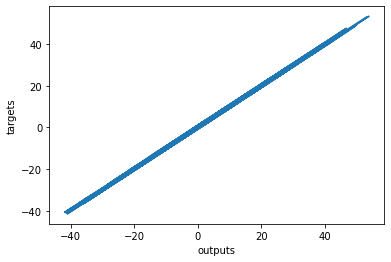

In [10]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))   ### Plotting the data
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()